In [1]:
using CSV
using DataFrames
using Dates
using Glob
using Plots: savefig
using StatsBase: mean

include("../src/SimPlot.jl")
using .SimPlot

In [2]:
function csv_to_df(dir_name_vec::Vector{String})::Vector{DataFrame}
    csv_file_names = []

    for dir_name in dir_name_vec
        append!(csv_file_names, glob("*.csv", "../output/$(dir_name)"))
    end

    return [CSV.File(csv_file_name) |> DataFrame for csv_file_name in csv_file_names]
end

function calc_mean(df::DataFrame)::DataFrame
    df = df[df.generation .% 10 .== 0, :]
    start = round(Int, nrow(df) * 0.1)
    _df = DataFrame(df[1, 1:11])
    _df.cooperation_rate .= mean(df.cooperation_rate[start:end])

    return _df
end

function make_mean_df(df_vec::Vector{DataFrame})::DataFrame
    mean_df = vcat([calc_mean(df) for df in df_vec]...)

    return sort(mean_df, names(mean_df)[1:11])
end;

In [3]:
df_vec = csv_to_df(["20230912_213005", "20230913_184334", "20230914_204859", "20230919_103015"])
mean_df = make_mean_df(df_vec)

Row,initial_N,T,S,initial_graph_weight,interaction_freqency,relationship_volatility,birth_rate,δ,μ,β,σ,cooperation_rate
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1000,0.0,-1.0,0.2,1.0,0.1,0.1,1.0,0.01,0.0,0.0,0.995749
2,1000,0.0,-1.0,0.2,1.0,0.1,0.1,1.0,0.01,0.0,0.0,0.995797
3,1000,0.0,-1.0,0.2,1.0,0.1,0.1,1.0,0.01,0.1,0.1,0.00759004
4,1000,0.0,-1.0,0.2,1.0,0.1,0.1,1.0,0.01,0.1,0.1,0.995768
5,1000,0.0,-1.0,0.2,1.0,0.1,0.1,1.0,0.01,0.4,0.4,0.00785169
6,1000,0.0,-1.0,0.2,1.0,0.1,0.1,1.0,0.01,0.4,0.4,0.995686
7,1000,0.0,-0.9,0.2,1.0,0.1,0.1,1.0,0.01,0.0,0.0,0.995806
8,1000,0.0,-0.9,0.2,1.0,0.1,0.1,1.0,0.01,0.1,0.1,0.995758
9,1000,0.0,-0.9,0.2,1.0,0.1,0.1,1.0,0.01,0.4,0.4,0.995612


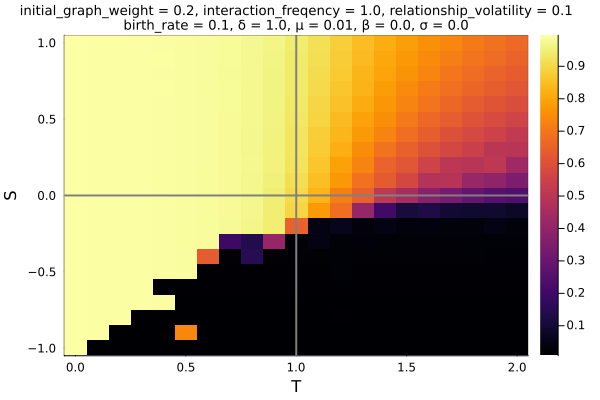

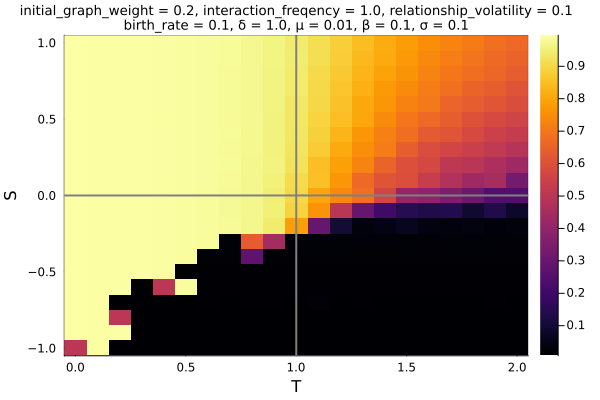

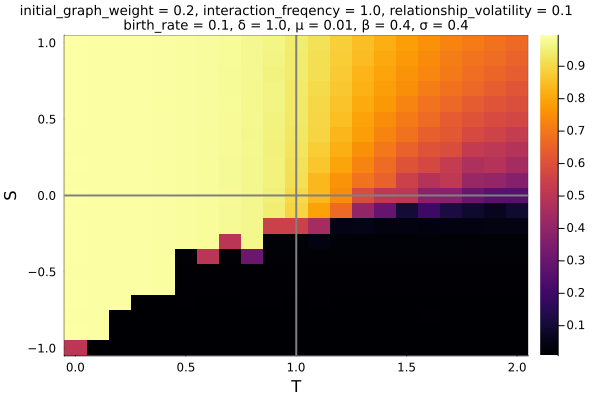

In [4]:
for df in groupby(mean_df, names(mean_df)[4:11])
    p = SimPlot.plot_cooperation_heatmap(df)
    # savefig(p, "../img/$(Dates.format(now(), "yyyymmdd_HHMMSSsss")).png")
    display(p)
end